## Chapter 2.2

Geophysics Preprocessing builds on the centered grid (https://github.com/cgre-aachen/gempy/blob/master/notebooks/tutorials/ch1-3-Grids.ipynb) to precompute the constant part of forward physical computations as for example gravity:

$$
F_z = G_\rho |||x \ln(y+r) + y\ln(x+r)-z \arctan \left( \frac{x y}{z  r} \right) |^{x_2}_{x_1}|^{y_2}_{y_1}|^{z_2}_{z_1}
$$

where we can compress the grid dependent terms as

$t_z = |||x \ln(y+r) + y\ln(x+r)-z \arctan \left( \frac{x y}{z  r} \right) |^{x_2}_{x_1}|^{y_2}_{y_1}|^{z_2}_{z_1}$

By doing this decomposition an keeping the grid constant we can compute the forward gravity by simply operate:

$F_z = G_\rho \cdot t_z$


In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
import theano
import qgrid


In [11]:
from gempy.assets.geophysics import GeophysicsPreprocessing

In [12]:
g = GeophysicsPreprocessing()

In [13]:
kernel_centers, kernel_dxyz_left, kernel_dxyz_right = g.create_irregular_grid_kernel(resolution=[10,10,20], radio=100)

`create_irregular_grid_kernel` will create a constant kernel around the point 0,0,0. This kernel will be what we use for each device.

In [16]:
kernel_centers, kernel_centers.shape

(array([[-100.        , -100.        ,   -6.        ],
        [-100.        , -100.        ,   -7.2       ],
        [-100.        , -100.        ,   -7.52912998],
        ...,
        [ 100.        ,  100.        ,  -79.90178533],
        [ 100.        ,  100.        , -100.17119644],
        [ 100.        ,  100.        , -126.        ]]), (2541, 3))

$t_z$ is only dependent on distance and therefore we can use the kerenel created on the previous cell

In [17]:
tz = g.set_tz_kernel(resolution=[10,10,20], radio=100)
tz, tz.shape

(array([-8.71779378e-13, -6.45654761e-13, -3.41584079e-13, ...,
        -1.09611372e-10, -1.41544735e-10, -1.51098425e-10]), (2541,))

To compute tz we also need the edges of each voxel. The distance to the edges are stored on `ernel_dxyz_left` and `kernel_dxyz_right`. We can plot all the data as follows:

In [18]:
a, b, c = kernel_centers, kernel_dxyz_left, kernel_dxyz_right

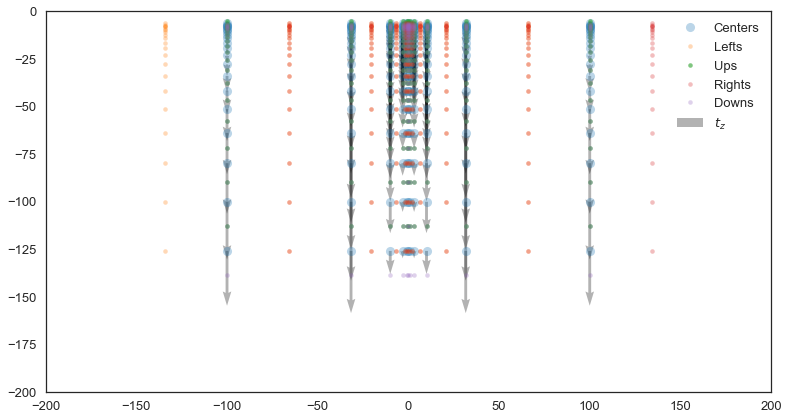

In [33]:
%matplotlib inline
fig = plt.figure(figsize=(13,7))
plt.quiver(a[:, 0].reshape(11,11,21)[5,:,:].ravel(),
          a[:, 2].reshape(11,11,21)[:,5,:].ravel(),
         np.zeros(231),
         tz.reshape(11,11,21)[5, :, :].ravel(), label='$t_z$', alpha = .3
         )

plt.plot(a[:, 0].reshape(11,11,21)[5,:,:].ravel() ,
         a[:, 2].reshape(11,11,21)[:,5,:].ravel(), 'o', alpha=.3, label='Centers')

plt.plot(a[:, 0].reshape(11,11,21)[5,:,:].ravel() - b[:, 0].reshape(11,11,21)[5,:,:].ravel(),
         a[:, 2].reshape(11,11,21)[:,5,:].ravel(), '.', alpha=.3, label='Lefts')

plt.plot(a[:, 0].reshape(11,11,21)[5,:,:].ravel(),
         a[:, 2].reshape(11,11,21)[:,5,:].ravel() - b[:, 2].reshape(11,11,21)[:,5,:].ravel(), '.' , alpha=.6, 
        label='Ups')

plt.plot(a[:, 0].reshape(11,11,21)[5,:,:].ravel() + c[:, 0].reshape(11,11,21)[5,:,:].ravel(),
         a[:, 2].reshape(11,11,21)[:,5,:].ravel(), '.',  alpha=.3, label='Rights')

plt.plot(a[:, 0].reshape(11,11,21)[5,:,:].ravel() ,
         a[:, 2].reshape(11,11,21)[:,5,:].ravel() + c[:, 2].reshape(11,11,21)[5,:,:].ravel(), '.', alpha=.3,
        label = 'Downs')

plt.xlim(-200, 200)
plt.ylim(-200, 0)
plt.legend()

Just the quiver:

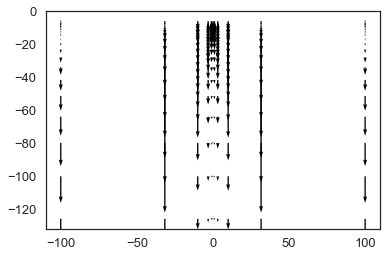

In [34]:
plt.quiver(a[:, 0].reshape(11,11,21)[5,:,:].ravel(),
          a[:, 2].reshape(11,11,21)[:,5,:].ravel(),
         np.zeros(231),
         tz.reshape(11,11,21)[5, :, :].ravel()
         )

Remember this is happening always in 3D:

Text(0.5, 0, 'Z Label')

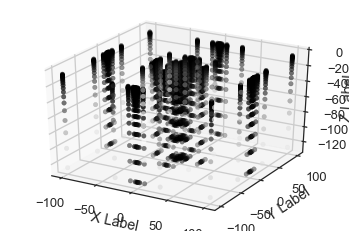

In [35]:
#%matplotlib qt5
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(a[:, 0], a[:,1], a[:, 2], c = tz)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
